#UEFA EURO 2024 Players Dataset

In [1]:
#link to the Kaggle dataset -> https://www.kaggle.com/datasets/damirdizdarevic/uefa-euro-2024-players

import pandas as pd
import numpy as np

##Data Exploration

In [2]:
df_euro_2024_players = pd.read_csv("/content/euro2024_players.csv")

In [3]:
df_euro_2024_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [ ]:
'''
About Dataset
Dataset of all the players that are in the squad of the teams participating
in the UEFA EURO 2024. Contains info about clubs, age, height, market value etc.
which can be very good for EDA and Data Visualizations.
'''

In [5]:
df_euro_2024_players.describe(include='all')

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
count,623,623,623.000000,623,623.000000,620,623.000000,623.000000,6.230000e+02,623
unique,623,13,NaN,219,NaN,4,NaN,NaN,NaN,24
top,Tomas Chory,Centre-Back,NaN,Inter Milan,NaN,right,NaN,NaN,NaN,Poland
freq,1,125,NaN,13,NaN,436,NaN,NaN,NaN,27
mean,NaN,NaN,27.040128,NaN,184.181380,NaN,30.338684,4.152488,1.840903e+07,NaN
std,NaN,NaN,4.124275,NaN,6.569258,NaN,30.987902,10.086803,2.426195e+07,NaN
min,NaN,NaN,16.000000,NaN,167.000000,NaN,0.000000,0.000000,5.000000e+04,NaN
25%,NaN,NaN,24.000000,NaN,180.000000,NaN,7.000000,0.000000,2.900000e+06,NaN
50%,NaN,NaN,27.000000,NaN,185.000000,NaN,21.000000,1.000000,9.000000e+06,NaN
75%,NaN,NaN,30.000000,NaN,189.000000,NaN,42.000000,4.000000,2.500000e+07,NaN


In [6]:
columns_euro_2024_players = [
    'Name', 'Position', 'Age', 'Club',
    'Height', 'Foot', 'Caps', 'Goals',
    'MarketValue', 'Country'
]

for col in columns_euro_2024_players:
    missing = df_euro_2024_players[col].isna().sum()
    duplicated = df_euro_2024_players[col].duplicated().sum()
    total_non_null = df_euro_2024_players[col].count()

    print(f"--- {col} ---")
    print(f"Missing values:        {missing}")
    print(f"Duplicated values:     {duplicated}")
    print(f"Total non-null values: {total_non_null}\n")

--- Name ---
Missing values:        0
Duplicated values:     0
Total non-null values: 623

--- Position ---
Missing values:        0
Duplicated values:     610
Total non-null values: 623

--- Age ---
Missing values:        0
Duplicated values:     599
Total non-null values: 623

--- Club ---
Missing values:        0
Duplicated values:     404
Total non-null values: 623

--- Height ---
Missing values:        0
Duplicated values:     589
Total non-null values: 623

--- Foot ---
Missing values:        3
Duplicated values:     618
Total non-null values: 620

--- Caps ---
Missing values:        0
Duplicated values:     510
Total non-null values: 623

--- Goals ---
Missing values:        0
Duplicated values:     584
Total non-null values: 623

--- MarketValue ---
Missing values:        0
Duplicated values:     540
Total non-null values: 623

--- Country ---
Missing values:        0
Duplicated values:     599
Total non-null values: 623



##Data Cleaning

In [7]:
#Position column

#Missing values:        0
#Duplicated values:     610
#Total non-null values: 623

df_euro_2024_players['Position'].value_counts()

,count
Position,
Centre-Back,125
Central Midfield,81
Centre-Forward,77
Goalkeeper,72
Defensive Midfield,50
Attacking Midfield,48
Left Winger,44
Right-Back,43
Right Winger,35


In [8]:
#Age column

#Missing values:        0
#Duplicated values:     599
#Total non-null values: 623

#range check -> (16, 41)
df_euro_2024_players['Age'].min(), df_euro_2024_players['Age'].max()

df_euro_2024_players['Age'].value_counts()

,count
Age,
25,62
27,59
26,58
28,56
24,52
29,44
23,42
31,36
30,36


In [9]:
#Club column

#Missing values:        0
#Duplicated values:     404
#Total non-null values: 623

df_euro_2024_players['Club'].value_counts()

,count
Club,
Inter Milan,13
Manchester City,13
FC Barcelona,12
Real Madrid,12
Paris Saint-Germain,12
...,...
Cracovia,1
Karlsruher SC,1
FC Metz,1


In [10]:
#Height column

#Missing values:        0
#Duplicated values:     589
#Total non-null values: 623

#range check -> (167, 202)
df_euro_2024_players['Height'].min(), df_euro_2024_players['Height'].max()

df_euro_2024_players['Height'].value_counts()

,count
Height,
188,43
178,42
185,39
190,38
180,38
183,32
186,32
182,32
189,31


In [11]:
#Foot column

#Missing values:        3
#Duplicated values:     618
#Total non-null values: 620

df_euro_2024_players['Foot'].value_counts()

,count
Foot,
right,436
left,150
both,31
-,3


In [12]:
#Caps column

#Missing values:        0
#Duplicated values:     510
#Total non-null values: 623

df_euro_2024_players['Caps'].value_counts()

,count
Caps,
1,37
3,27
2,22
6,17
4,16
...,...
85,1
112,1
108,1


In [13]:
#Goals column

#Missing values:        0
#Duplicated values:     584
#Total non-null values: 623

df_euro_2024_players['Goals'].value_counts()

,count
Goals,
0,253
1,94
2,70
3,44
4,23
8,19
5,16
6,14
11,12


In [14]:
#MarketValue column

#Missing values:        0
#Duplicated values:     540
#Total non-null values: 623

#range check -> (50.000, 180.000.000)
df_euro_2024_players['MarketValue'].min(), df_euro_2024_players['MarketValue'].max()

df_euro_2024_players['MarketValue'].value_counts()

,count
MarketValue,
5000000,28
2500000,26
3000000,26
10000000,25
30000000,25
...,...
50000,1
1100000,1
250000,1


In [15]:
#Country column

#Missing values:        0
#Duplicated values:     599
#Total non-null values: 623

df_euro_2024_players['Country'].value_counts()

,count
Country,
Poland,27
Germany,26
Hungary,26
Scotland,26
Spain,26
Croatia,26
Albania,26
Switzerland,26
Italy,26


##Data Visualization

Position
Centre-Back           125
Central Midfield       81
Centre-Forward         77
Goalkeeper             72
Defensive Midfield     50
Attacking Midfield     48
Left Winger            44
Right-Back             43
Right Winger           35
Left-Back              33
Name: count, dtype: int64


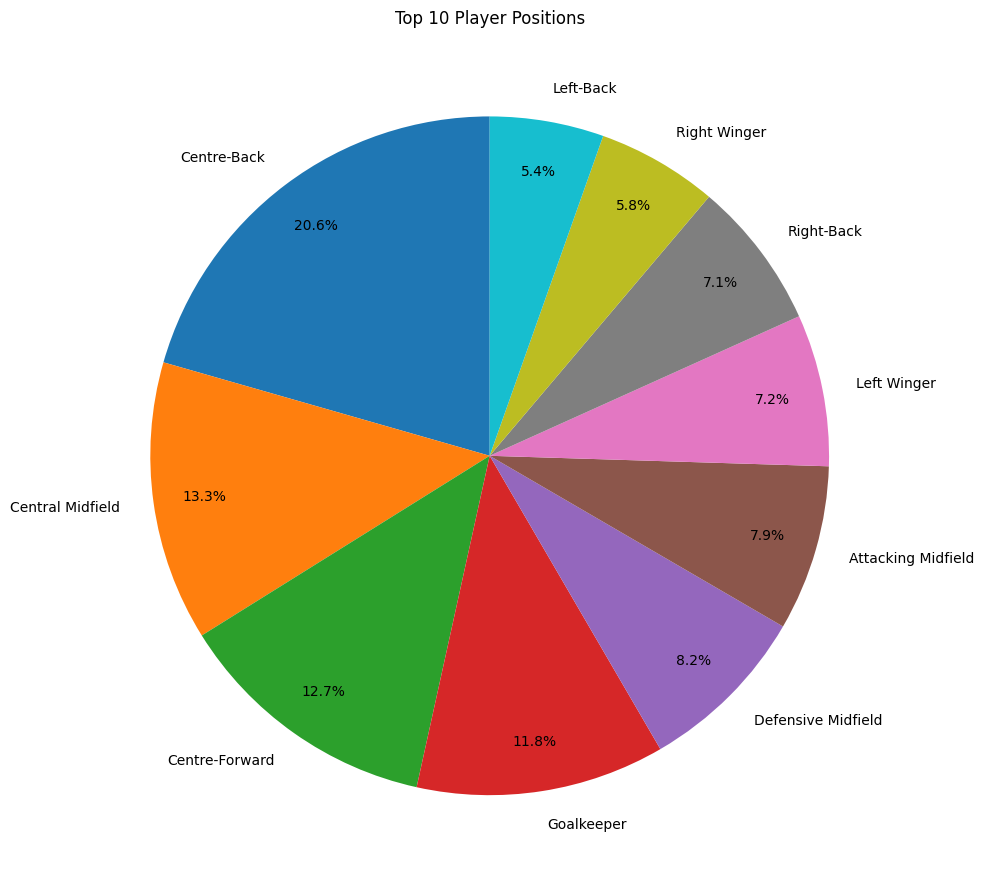

In [19]:
#Position column

position_counts = df_euro_2024_players['Position'].value_counts().head(10)
print(position_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 10 Player Positions')
plt.ylabel('')
plt.tight_layout()
plt.show()

Age
25    62
27    59
26    58
28    56
24    52
29    44
23    42
31    36
30    36
Name: count, dtype: int64


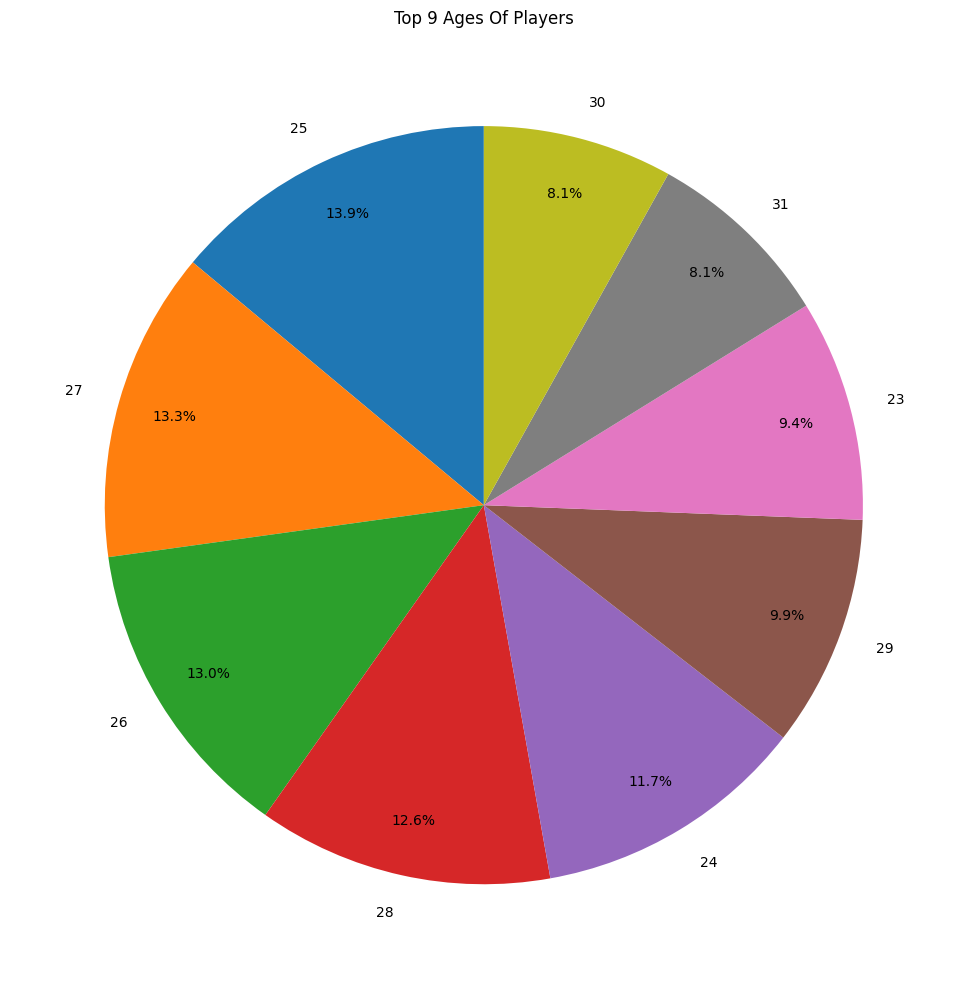

In [21]:
#Age column

age_counts = df_euro_2024_players['Age'].value_counts().head(9)
print(age_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 9 Ages Of Players')
plt.ylabel('')
plt.tight_layout()
plt.show()

Club
Inter Milan            13
Manchester City        13
FC Barcelona           12
Real Madrid            12
Paris Saint-Germain    12
RB Leipzig             11
Bayern Munich          11
Bayer 04 Leverkusen    10
Arsenal FC             10
Name: count, dtype: int64


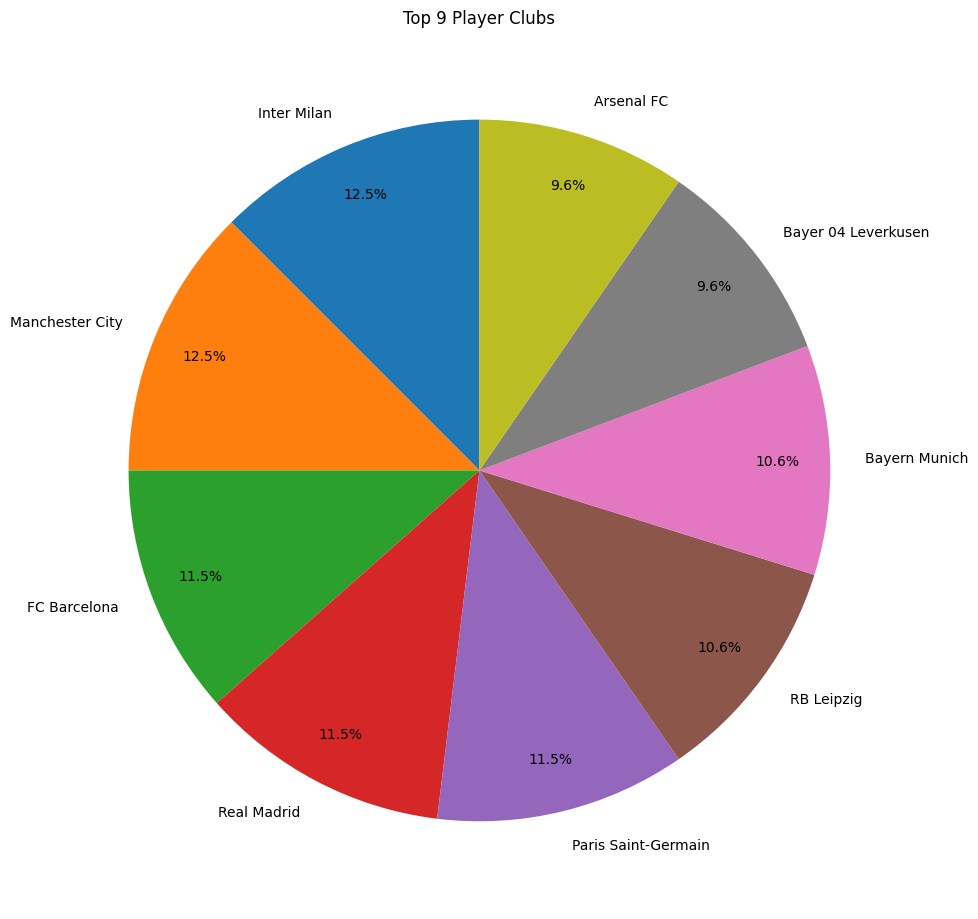

In [24]:
#Club column

club_counts = df_euro_2024_players['Club'].value_counts().head(9)
print(club_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
club_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 9 Player Clubs')
plt.ylabel('')
plt.tight_layout()
plt.show()

Height
188    43
178    42
185    39
190    38
180    38
183    32
186    32
182    32
189    31
Name: count, dtype: int64


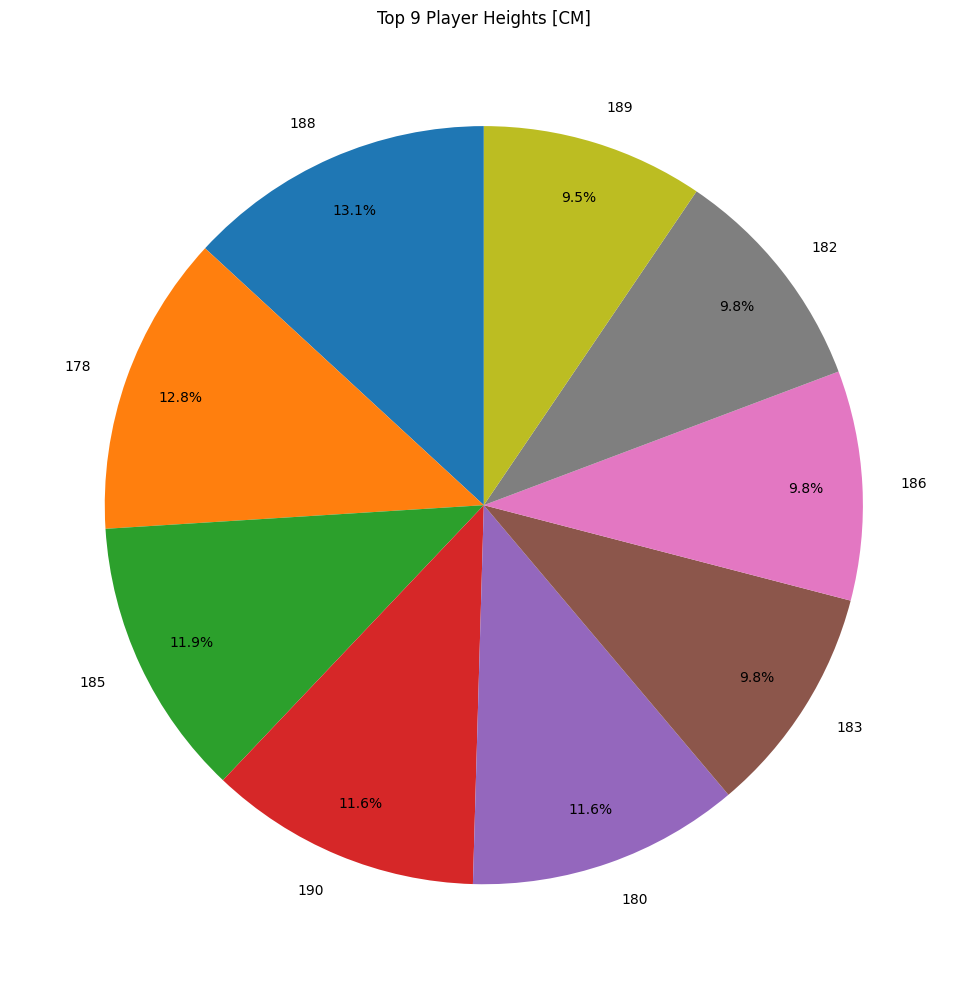

In [28]:
#Height column

height_counts = df_euro_2024_players['Height'].value_counts().head(9)
print(height_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
height_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 9 Player Heights [CM]')
plt.ylabel('')
plt.tight_layout()
plt.show()

Foot
right    436
left     150
both      31
-          3
Name: count, dtype: int64


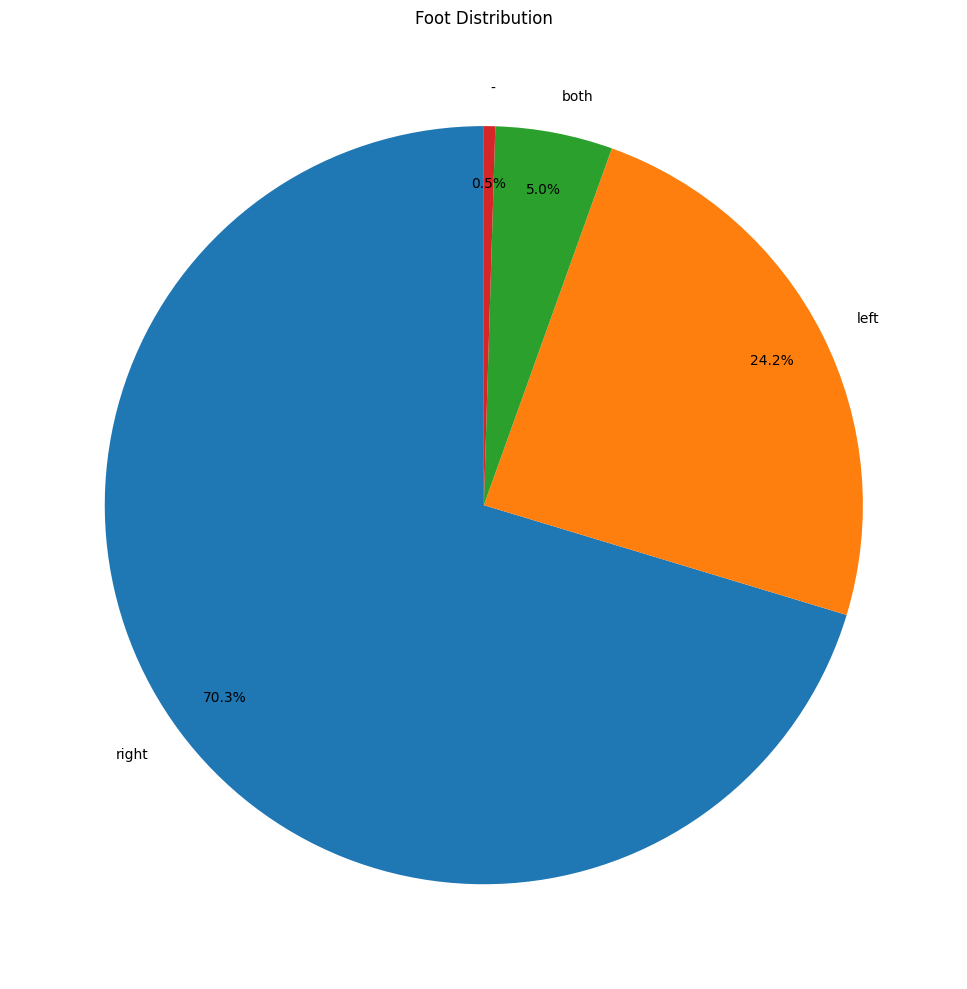

In [29]:
#Foot column

foot_counts = df_euro_2024_players['Foot'].value_counts()
print(foot_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
foot_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Foot Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

MarketValue
5000000     28
2500000     26
3000000     26
10000000    25
30000000    25
Name: count, dtype: int64


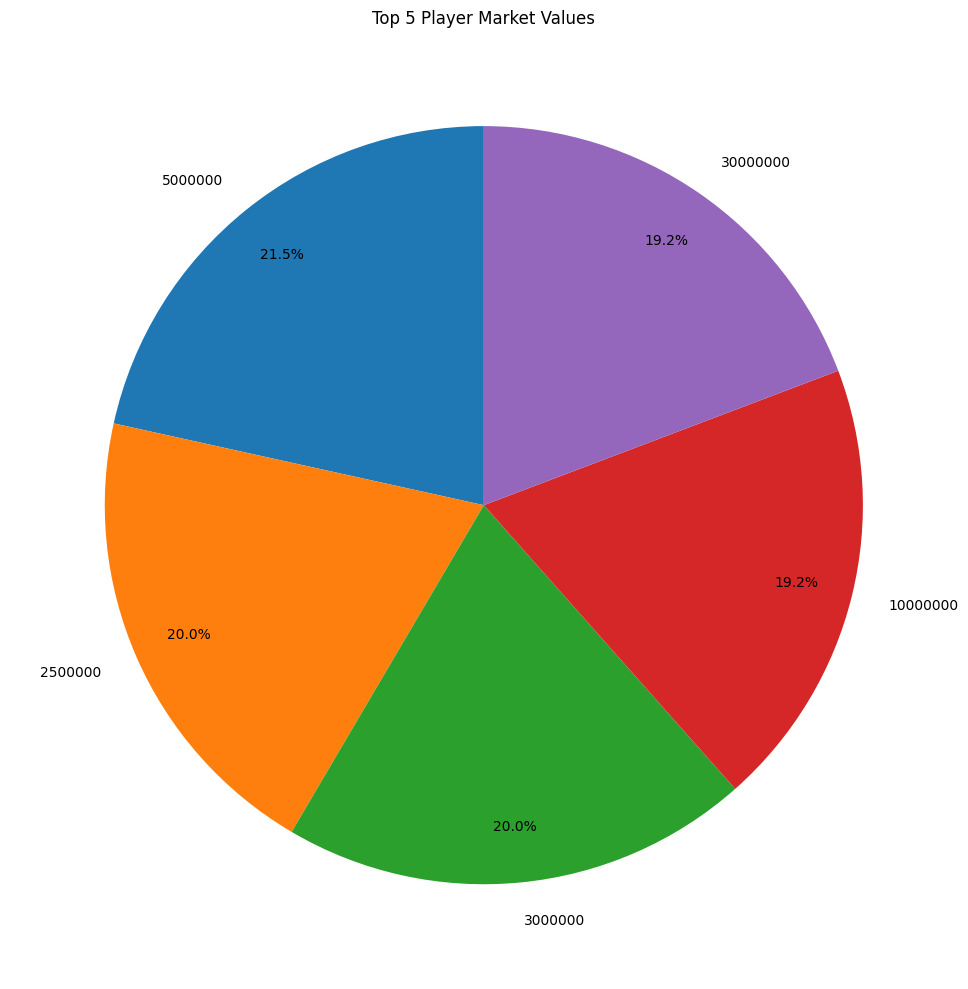

In [34]:
#MarketValue column

market_value_counts = df_euro_2024_players['MarketValue'].value_counts().head(5)
print(market_value_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
market_value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 5 Player Market Values')
plt.ylabel('')
plt.tight_layout()
plt.show()

Country
Poland            27
Germany           26
Hungary           26
Scotland          26
Spain             26
Croatia           26
Albania           26
Switzerland       26
Italy             26
Slovenia          26
Denmark           26
England           26
Serbia            26
Netherlands       26
Austria           26
Slovakia          26
Portugal          26
Romania           26
Ukraine           26
Turkiye           26
Czech Republic    26
Georgia           26
France            25
Belgium           25
Name: count, dtype: int64


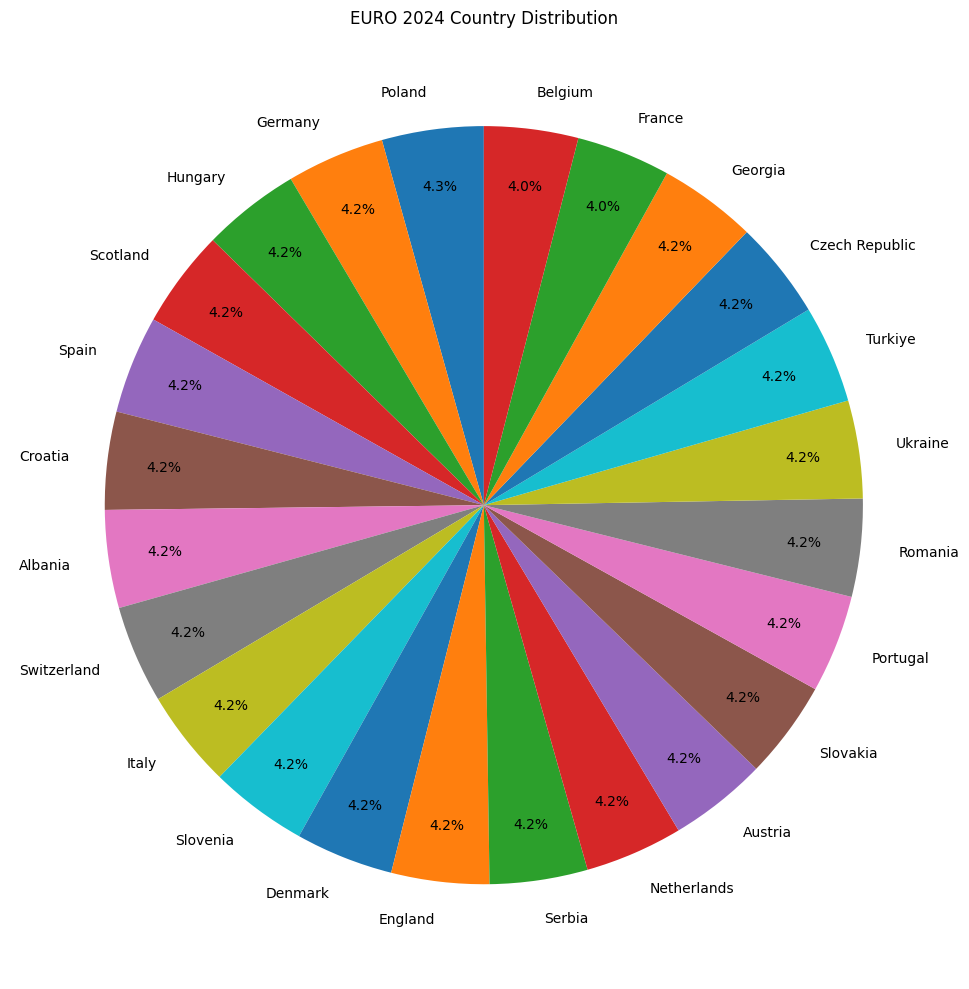

In [38]:
#Country column

country_counts = df_euro_2024_players['Country'].value_counts()
print(country_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('EURO 2024 Country Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()